In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)%%!
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Methods

+ Filter methods select features from a dataset independently for any machine learning algorithm. These methods rely only on the characteristics of these variables, so features are filtered out of the data before learning begins.

+ Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here

+ Filter Methods:
  
  + Correlation methods
  
  + Statistical Measures
  
  + Mutual Information
 
  + Chi Squared Score

In [28]:
ratings_data = pd.read_csv("./dataset/ratings.csv")
movies_data = pd.read_csv("./dataset/movies.csv")
links_data = pd.read_csv("./dataset/links_production.csv")

data = pd.merge(ratings_data, pd.merge(movies_data, links_data, on="movieId"), on="movieId")
data['genres'] = data['genres'].apply(lambda x: x.split('|'))
data.to_csv("./dataset/movielens_1m_summary.csv", index=False)
data.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,true imdbId,director,writers,stars
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,tt0114709,['John Lasseter'],"['Pete Docter', 'Andrew Stanton', 'John Lasset...","['Tom Hanks', 'Tim Allen', 'Don Rickles']"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0,tt0113228,['Howard Deutch'],"['Mark Steven Johnson', 'Writer']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]",113277,949.0,tt0113277,['Michael Mann'],['Michael Mann'],"['Robert De Niro', 'Al Pacino', 'Val Kilmer']"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",114369,807.0,tt0114369,['David Fincher'],['Andrew Kevin Walker'],"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",114814,629.0,tt0114814,['Bryan Singer'],['Christopher McQuarrie'],"['Gabriel Byrne', 'Chazz Palminteri', 'Kevin S..."


### Analysis

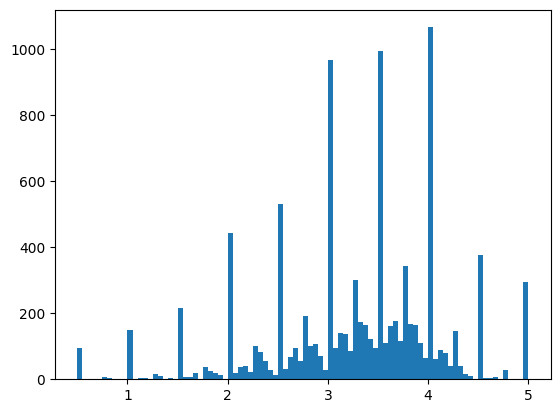

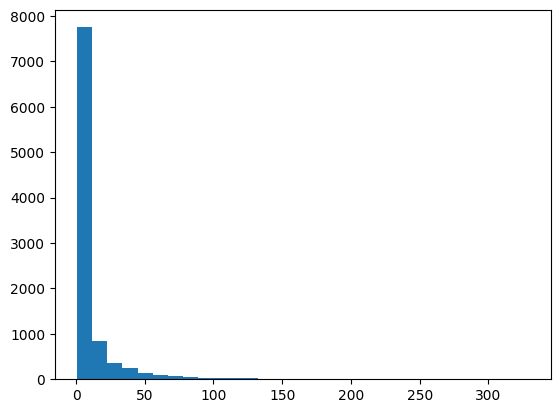

,title,rating_count,rating_mean
0,'71 (2014),1,4.0
1,'Hellboy': The Seeds of Creation (2004),1,4.0
2,'Round Midnight (1986),2,3.5
3,'Salem's Lot (2004),1,5.0
4,'Til There Was You (1997),2,4.0


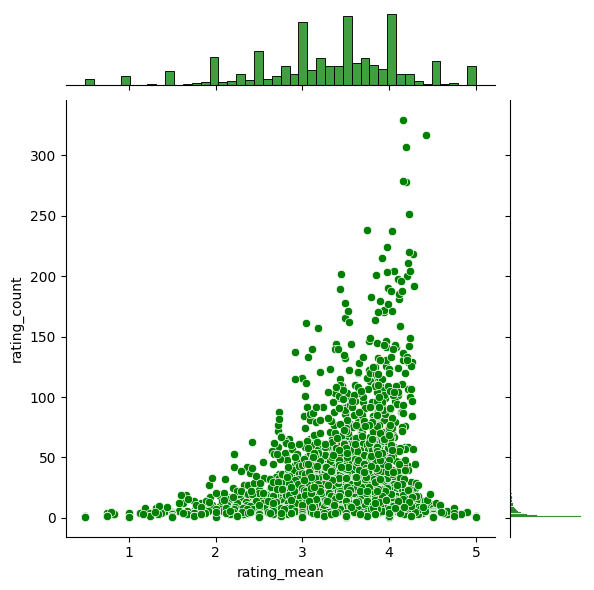

In [64]:
# Load dataset (assuming it's a CSV file)
df = pd.read_csv("./dataset/movielens_1m_summary.csv")

# Convert genres, directors, writers, and stars from string to list
df['genres'] = df['genres'].apply(lambda x: eval(x))
df['director'] = df['director'].apply(lambda x: eval(x))  # Convert from string representation of list
df['writers'] = df['writers'].apply(lambda x: eval(x))    # Convert from string representation of list
df['stars'] = df['stars'].apply(lambda x: eval(x))        # Convert from string representation of list

# 1. Group by **Title** (Count & Mean Rating)
title_stats = df.groupby('title')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 2. Group by **Genres** (Explode to analyze each genre separately)
genre_stats = df.explode('genres').groupby('genres')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 3. Group by **Director** (Explode)
director_stats = df.explode('director').groupby('director')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 4. Group by **Writers** (Explode)
writer_stats = df.explode('writers').groupby('writers')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 5. Group by **Stars** (Explode)
stars_stats = df.explode('stars').groupby('stars')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# Display dataframes

plt.hist(title_stats['rating_mean'], bins=90)
plt.show()
plt.hist(title_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=title_stats['rating_mean'], 
              y=title_stats['rating_count'], data=title_stats,
              color='green', height=6)

title_stats.head()

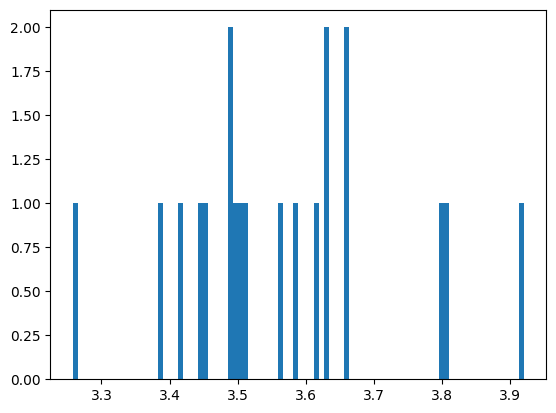

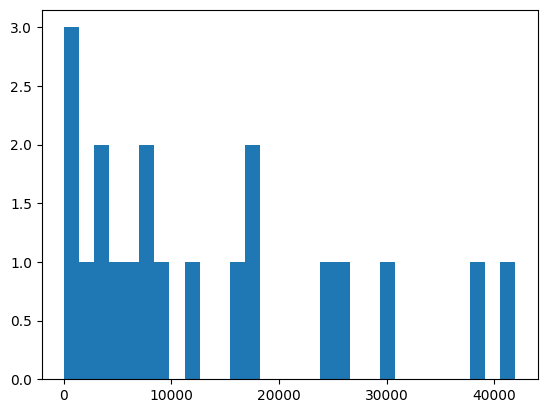

,genres,rating_count,rating_mean
0,(no genres listed),47,3.489362
1,Action,30635,3.447984
2,Adventure,24161,3.508609
3,Animation,6988,3.629937
4,Children,9208,3.412956


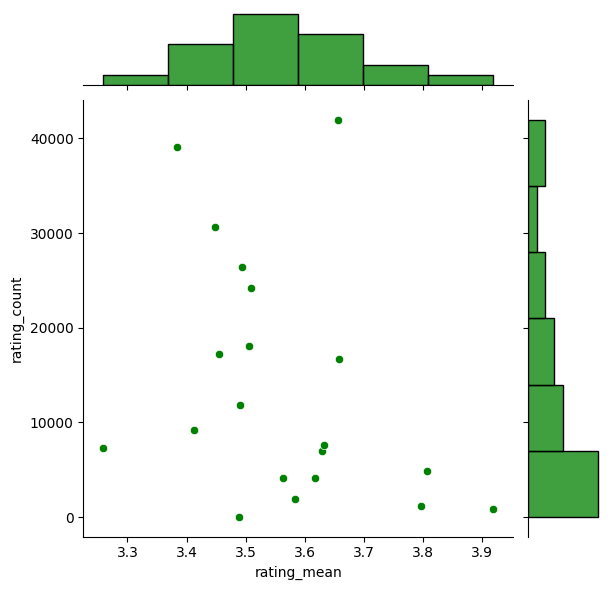

In [65]:

plt.hist(genre_stats['rating_mean'], bins=90)
plt.show()
plt.hist(genre_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=genre_stats['rating_mean'], 
              y=genre_stats['rating_count'], data=genre_stats,
              color='green', height=6)

genre_stats.head()

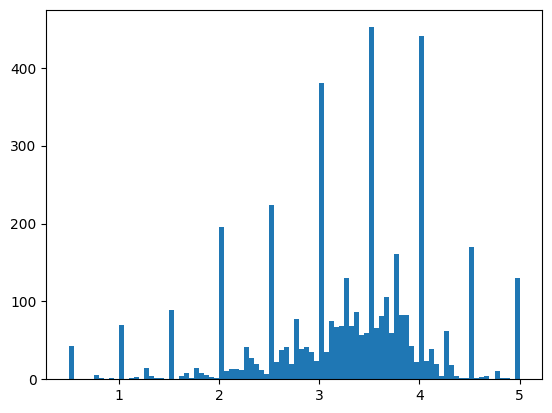

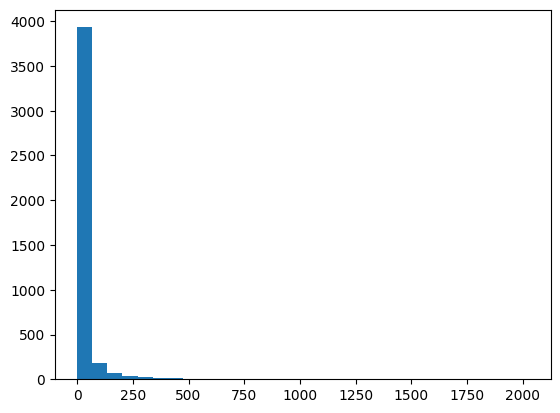

,director,rating_count,rating_mean
0,AJ Schnack,4,4.00
1,Aamir Khan,2,4.50
2,Aaron Blaise,2,3.00
3,Aaron Harvey,2,1.25
4,Aaron Lipstadt,2,4.50


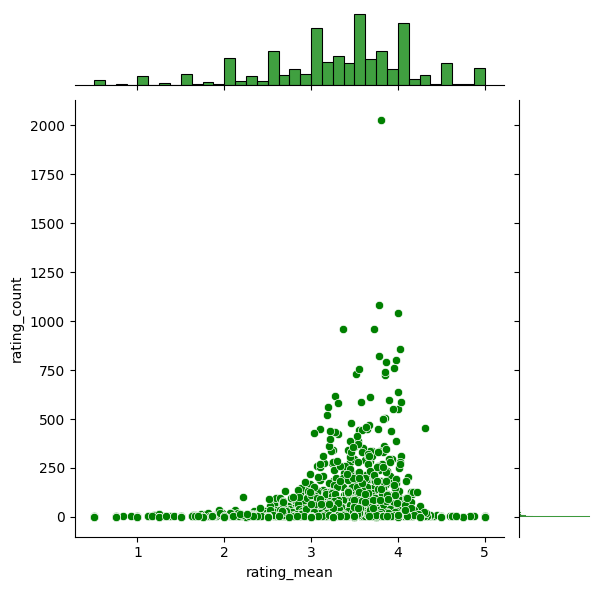

In [66]:
plt.hist(director_stats['rating_mean'], bins=90)
plt.show()
plt.hist(director_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=director_stats['rating_mean'], 
              y=director_stats['rating_count'], data=director_stats,
              color='green', height=6)

director_stats.head()

In [47]:
writer_stats.head()

,writers,rating_count,rating_mean
0,'Weird Al' Yankovic,9,3.444444
1,A L Katz,2,1.750000
2,A. Scott Berg,1,3.000000
3,A.A. Milne,10,3.750000
4,A.B. 'Banjo' Paterson,6,3.083333


In [48]:
stars_stats.head()

,stars,rating_count,rating_mean
0,'Weird Al' Yankovic,9,3.444444
1,50 Cent,4,4.000000
2,7 Year Bitch,1,5.000000
3,A-Trak,3,3.833333
4,A. Belozorovich,1,5.000000


In [49]:
df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,true imdbId,director,writers,stars
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,tt0114709,[John Lasseter],"[Pete Docter, Andrew Stanton, John Lasseter]","[Tom Hanks, Tim Allen, Don Rickles]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0,tt0113228,[Howard Deutch],"[Mark Steven Johnson, Writer]","[Walter Matthau, Jack Lemmon, Ann-Margret]"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]",113277,949.0,tt0113277,[Michael Mann],[Michael Mann],"[Robert De Niro, Al Pacino, Val Kilmer]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",114369,807.0,tt0114369,[David Fincher],[Andrew Kevin Walker],"[Morgan Freeman, Brad Pitt, Kevin Spacey]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",114814,629.0,tt0114814,[Bryan Singer],[Christopher McQuarrie],"[Gabriel Byrne, Chazz Palminteri, Kevin Spacey]"


In [56]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression, f_regression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Convert categorical variables to numerical representations
df = pd.read_csv("./dataset/movielens_1m_summary.csv")

# Drop unnecessary columns
columns_to_drop = ["timestamp", "imdbId", "tmdbId", "true imdbId"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# 
encoder = LabelEncoder()
df['userId'] = encoder.fit_transform(df['userId'])
df['movieId'] = encoder.fit_transform(df['movieId'])


# Convert list-type columns to a single categorical string for encoding
df['genres'] = df['genres'].apply(lambda x: ' '.join(x))
df['director'] = df['director'].apply(lambda x: ' '.join(x))
df['writers'] = df['writers'].apply(lambda x: ' '.join(x))
df['stars'] = df['stars'].apply(lambda x: ' '.join(x))

# Encoding categorical features numerically
df['genres'] = encoder.fit_transform(df['genres'])
df['director'] = encoder.fit_transform(df['director'])
df['writers'] = encoder.fit_transform(df['writers'])
df['stars'] = encoder.fit_transform(df['stars'])

# List of categorical columns to encode
categorical_columns = ["title", "genres", "director", "writers", "stars"]

# Apply Label Encoding to categorical features
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Define features and target variable
X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

# 1. Variance Threshold (Remove low-variance features)
selector = VarianceThreshold(threshold=0.01)
X_var_filtered = selector.fit_transform(X)

# Retain column names after Variance Thresholding
selected_columns = X.columns[selector.get_support()]
X_var_filtered_df = pd.DataFrame(X_var_filtered, columns=selected_columns)

# 2. Correlation-Based Feature Selection
cor_matrix = X_var_filtered_df.corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_corr_filtered = X_var_filtered_df.drop(columns=to_drop, errors='ignore')

# 3. Mutual Information for Feature Selection
mi_scores = mutual_info_regression(X_corr_filtered, y)
mi_series = pd.Series(mi_scores, index=X_corr_filtered.columns).sort_values(ascending=False)
top_mi_features = mi_series.head(5).index
X_mi_filtered = X_corr_filtered[top_mi_features]

# 4. ANOVA (F-test) for Feature Selection
anova_selector = SelectKBest(score_func=f_regression, k=min(5, X_corr_filtered.shape[1]))  # Ensure we do not exceed available features
X_anova_filtered = anova_selector.fit_transform(X_corr_filtered, y)
anova_selected_features = X_corr_filtered.columns[anova_selector.get_support()]

# Display the selected features
selected_features_df = pd.DataFrame({
    "Feature": list(top_mi_features) + list(anova_selected_features),
    "Selection Method": ["Mutual Information"] * len(top_mi_features) + ["ANOVA"] * len(anova_selected_features)
}).drop_duplicates()

selected_features_df

,Feature,Selection Method
0,userId,Mutual Information
1,movieId,Mutual Information
2,title,Mutual Information
3,stars,Mutual Information
4,writers,Mutual Information
5,userId,ANOVA
6,movieId,ANOVA
7,title,ANOVA
8,genres,ANOVA
9,director,ANOVA


In [59]:
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

# Convert rating into categorical bins
df['rating_category'] = pd.cut(df['rating'], bins=[0, 2, 3, 4, 5], labels=['Low', 'Medium', 'High', 'Very High'])

# Use categorical target for Chi-Square and LDA
y_categorical = df['rating_category']

# Use continuous target for Pearson correlation and Mutual Information
y_continuous = df['rating']

# 1. Chi-Square Test (For categorical data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features
chi2_selector = SelectKBest(score_func=chi2, k=min(5, X.shape[1]))
X_chi2_filtered = chi2_selector.fit_transform(X_scaled, y_categorical)
chi2_selected_features = X.columns[chi2_selector.get_support()]

# 2. Pearson Correlation
pearson_results = {col: pearsonr(X[col], y_continuous)[0] for col in X.columns}
pearson_df = pd.DataFrame(pearson_results.items(), columns=['Feature', 'Pearson Correlation'])
pearson_df = pearson_df.sort_values(by='Pearson Correlation', ascending=False).head(5)

# 3. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y_categorical)

# Display results
chi2_df = pd.DataFrame({
    "Feature": chi2_selected_features,
    "Selection Method": "Chi-Square"
})

lda_df = pd.DataFrame({
    "Feature": X.columns,
    "LDA Coefficient": lda.coef_[0]
}).sort_values(by="LDA Coefficient", ascending=False).head(5)

# Merging results into a single dataframe
final_selected_features = pd.concat([chi2_df, pearson_df, lda_df.rename(columns={"LDA Coefficient": "Selection Score"})])


final_selected_features

,Feature,Selection Method,Pearson Correlation,Selection Score
0,userId,Chi-Square,NaN,NaN
1,movieId,Chi-Square,NaN,NaN
2,title,Chi-Square,NaN,NaN
3,genres,Chi-Square,NaN,NaN
4,director,Chi-Square,NaN,NaN
3,genres,NaN,0.029996,NaN
2,title,NaN,0.012961,NaN
6,stars,NaN,0.011555,NaN
5,writers,NaN,-0.008702,NaN
4,director,NaN,-0.014940,NaN
